## Intro to `jeepr`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import jeepr
jeepr.__version__

'0.1.2'

## Make `Scan` from a USRadar RAD file

In [3]:
from jeepr import Scan

In [4]:
s = Scan.from_rad('../tests/Multi-01_LINE00A.RA1')

In [5]:
s.domain

'time'

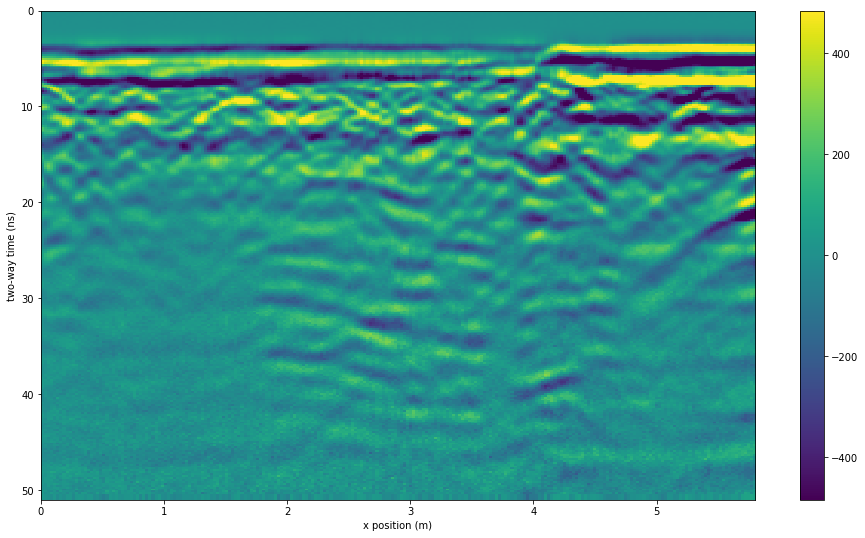

In [27]:
s.demean().gain().plot()

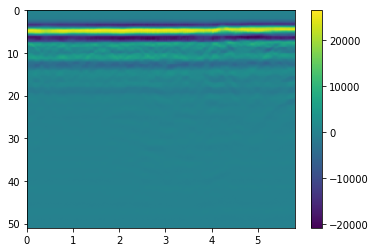

In [7]:
plt.imshow(s, extent=s.extent, aspect='auto')
plt.colorbar()

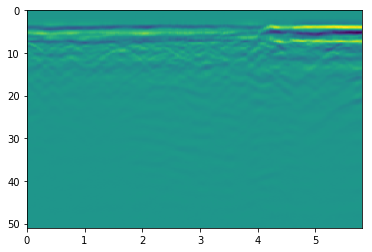

In [8]:
plt.imshow(s.demean(), extent=s.extent, aspect='auto')

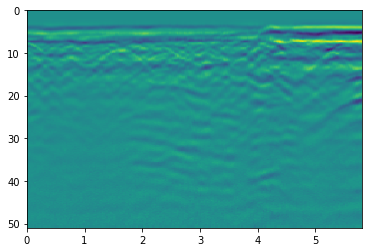

In [9]:
plt.imshow(s.demean().gain(method='linear'), extent=s.extent, aspect='auto')

In [10]:
s.meta

{'ACQUISITION_DATE': '03/02/17',
 'ACQUISITION_TIME': '10:30:31',
 'ANTENNA_TYPE': '3',
 'ANTENNA_TYPE_DETECTED': 'eQUANTUM',
 'GPS_TYPE': 'INTERNAL',
 'MIGRATION_TYPE': 'NONE',
 'NOTE': 'Ver:5.1.1134_Machine:4af33599664f73c57b04',
 'OBSERVER': '',
 'RADAR_HEAD_MARK': '3',
 'SPR_CHANNELS_TOTAL': '3',
 'SPR_CHANNEL_NUM': '1',
 'SPR_FILE_VERSION': '7',
 'SPR_INTERVAL_MARKER': '1',
 'SPR_LINE_COUNT': '1',
 'SPR_LINE_SEPARATION': '1',
 'SPR_MEDIUM_DIELECTRIC': '08.95',
 'SPR_NO_AVERAGES': 'AVG_4',
 'SPR_SAMPLES_PER_SCAN': '256',
 'SPR_SAMPLING_INTERVAL': '200',
 'SPR_SHAFT_INTERVAL': '0.025',
 'SPR_SW_AVERAGES': '32',
 'SPR_TIMER_FREQUENCY': '10',
 'SPR_TRIGGER_MODE': 'SHAFT',
 'TRACE_SORT': 'COMMON_OFFSET',
 'TVG_SLOPE': '15',
 'TVG_START_GAIN': '3',
 'UNITS': 'METERS'}

In [11]:
s.dt

2e-10

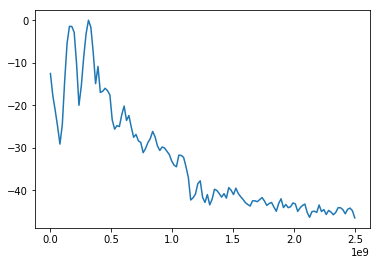

In [12]:
f, p = s.get_spectrum()

plt.plot(f, p)

## Make `Scan` from a `gprMax` simulation `.out` file

In [13]:
g = Scan.from_gprmax('../tests/gprMax_Bscan_merged.out')

In [14]:
g.dt

4.7173086734993682e-12

In [15]:
g.time[:20]

array([  0.00000000e+00,   4.71730867e-12,   9.43461735e-12,
         1.41519260e-11,   1.88692347e-11,   2.35865434e-11,
         2.83038520e-11,   3.30211607e-11,   3.77384694e-11,
         4.24557781e-11,   4.71730867e-11,   5.18903954e-11,
         5.66077041e-11,   6.13250128e-11,   6.60423214e-11,
         7.07596301e-11,   7.54769388e-11,   8.01942474e-11,
         8.49115561e-11,   8.96288648e-11])

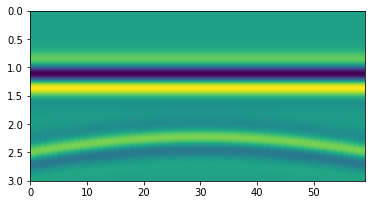

In [16]:
plt.imshow(g, extent=g.extent, aspect=10)

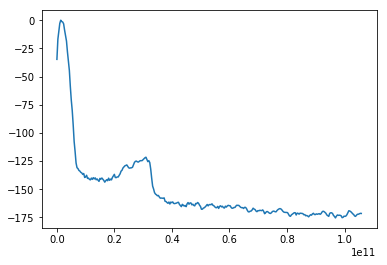

In [18]:
f, p = g.get_spectrum()

plt.plot(f, p)

## Make `Model` from `gprMax` VTI file

In [19]:
from jeepr import Model

In [20]:
m = Model.from_gprMax('../tests/test_2D.in')

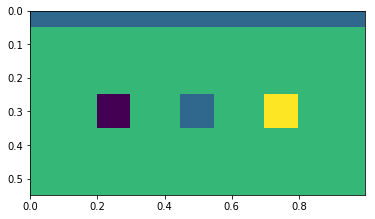

In [21]:
plt.imshow(m, extent=m.extent)

In [22]:
m_time, t = m.to_time(dt=5e-11)

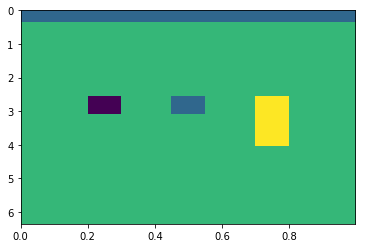

In [23]:
plt.imshow(m_time, extent=m_time.extent, aspect=0.1)

In [24]:
m.__dict__

{'domain': 'depth',
 'dt': 0,
 'dx': 0.004,
 'dx_dy_dz': (0.004, 0.004, 0.002),
 'dz': 0.002,
 'materials': [{'name': 'pec', 'value': 0},
  {'name': 'free_space', 'value': 1},
  {'name': 'soil', 'value': 2},
  {'name': 'concrete', 'value': 3}],
 'name': '',
 'npml': 10,
 'permittivities': array([ 1.      ,  1.000536,  3.      ,  7.      ]),
 'rx': {'name': 'Rx(50,250,0)',
  'position': array([ 0.2,  1. ,  0. ]),
  'value': 1},
 'rx_steps': [0.01, 0.0, 0.0],
 'tx': {'name': 'HertzianDipole(25,250,0)',
  'position': array([ 0.1,  1. ,  0. ]),
  'type': 'HertzianDipole',
  'value': 2},
 'tx_steps': [0.01, 0.0, 0.0]}

In [25]:
m_time.dt

5e-11